# Mandatory Assignment 2 by Carlos Reiakvam

### Problem text
You are given a basic, bare-bones neural network written in Numpy. You will take basis in that code and add some modifications. These are as follows:

1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

2: Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.

3: Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?

In [884]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m
import time
np.random.seed(1)

### Activation functions

In [885]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x)* (1-sigmoid(x))

In [886]:
def relu(x):
    return (x > 0) * x

def relu_grad(x):
    return x > 0

### Training function

In [887]:
def nn(epochs,ws_1, ws_2, af, af_diff,lr):
    errors =[]
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

            #forward pass/prediction
            layer_1 = af(layer_in.dot(ws_1))
            layer_out = layer_1.dot(ws_2)

            #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1] # ifht ws2

            #calc the error each node in prev layer contributed
            delta_1 = delta_2.dot(ws_2.T) * af_diff(layer_1) #ifht ws1

            #update weights
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2)) #pred dot feilmargin_ws2
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1)) #lay_in dot feilmargin_ws1

        if epoch % 10 == 0: # at every tenth instance
            error = delta_2**2
            errors.append(error[0][0])
    return errors

### Dataset initialization

In [888]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [889]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [890]:
X,y = streetlights, walk_vs_stop
hidden_nodes = 8

### Setting weights

In [891]:
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5 #rand(3,8) from -0.5 to 0.5
ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5 # rand(8,1)

### Adjustment parameters

In [892]:
epochs = 1000  # number of iterations to go through the network
lr = 0.01      # how much we change the weights of the network each iteration

---
# Problems 1
1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

### Training with different activation functions

In [893]:
sigmoid_errors = nn(epochs,ws_1,ws_2,sigmoid, sigmoid_diff,lr)

In [894]:
relu_errors = nn(epochs,ws_1,ws_2,relu, relu_grad,lr)

### Investigating results of Sigmoid vs Relu

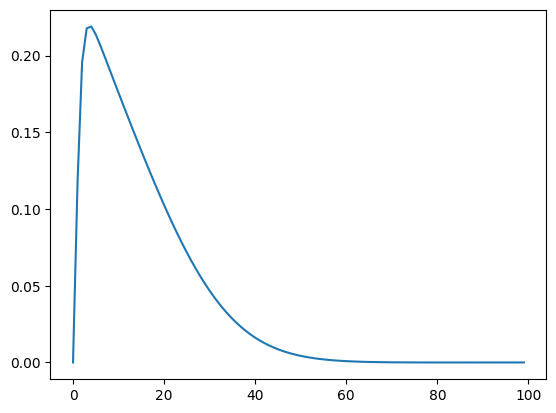

In [895]:
plt.plot(sigmoid_errors)

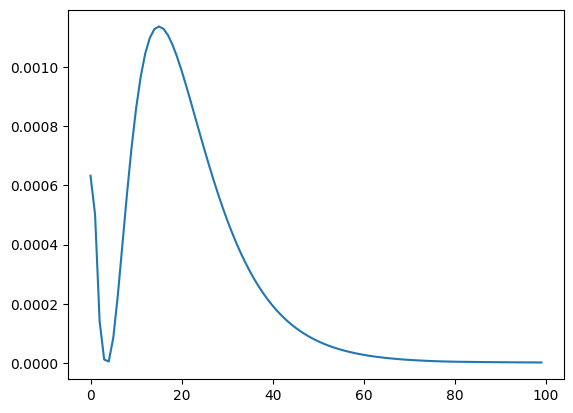

In [896]:
plt.plot(relu_errors)

In [897]:
error_comparison = np.array([sigmoid_errors,relu_errors]).T
error_comparison

array([[1.02036432e-05, 6.33081086e-04],
       [1.18241935e-01, 5.01605039e-04],
       [1.95881839e-01, 1.40368199e-04],
       [2.17797788e-01, 1.12267535e-05],
       [2.19033241e-01, 4.61751528e-06],
       [2.13802032e-01, 8.50027949e-05],
       [2.06670267e-01, 2.29120132e-04],
       [1.99016505e-01, 3.99318305e-04],
       [1.91246205e-01, 5.70306217e-04],
       [1.83476417e-01, 7.26622114e-04],
       [1.75741152e-01, 8.59825097e-04],
       [1.68052214e-01, 9.66249479e-04],
       [1.60416975e-01, 1.04535289e-03],
       [1.52843396e-01, 1.09853728e-03],
       [1.45341268e-01, 1.12832270e-03],
       [1.37922326e-01, 1.13777953e-03],
       [1.30600022e-01, 1.13014866e-03],
       [1.23389189e-01, 1.10859720e-03],
       [1.16305666e-01, 1.07607059e-03],
       [1.09365903e-01, 1.03521217e-03],
       [1.02586574e-01, 9.88328805e-04],
       [9.59841857e-02, 9.37386817e-04],
       [8.95747101e-02, 8.84027149e-04],
       [8.33732366e-02, 8.29591635e-04],
       [7.739365

### Comment on the findings (needs further explanation)
Looking at the plot and the comparison table we can see that although the sigmoid-errors start of pretty low they quickly ramp up, before descending again. The relu-errors on the other hand starts off lower, has less of a ramp up and also descends quicker than the sigmoid. Seemingly beating it in every way possible.

---
# Problem 2
Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.

### Running nn with different learning rates

In [898]:
lrs, errors = [0.001, 0.01, 0.1, 1, 10], []
epochs = 500
for lr in lrs:
    errors.append(nn(epochs, ws_1, ws_2, relu, relu_grad, lr))

In [899]:
rs_np = np.array(errors).T
df = pd.DataFrame(rs_np, columns=['0.001','0.01','0.1','1','10'])
df

,0.001,0.01,0.1,1,10
0,1.176953e-06,9.309830e-07,1.181575e-07,0.0,0.0
1,1.169962e-06,8.897226e-07,7.552264e-08,0.0,0.0
2,1.163081e-06,8.491482e-07,4.840063e-08,0.0,0.0
3,1.156305e-06,8.100107e-07,3.375942e-08,0.0,0.0
4,1.149628e-06,7.724998e-07,2.041278e-08,0.0,0.0
5,1.143044e-06,7.366331e-07,1.193475e-08,0.0,0.0
6,1.136548e-06,7.023741e-07,6.835850e-09,0.0,0.0
7,1.130136e-06,6.696688e-07,4.428473e-09,0.0,0.0
8,1.123803e-06,6.384578e-07,2.559987e-09,0.0,0.0
9,1.117547e-06,6.086801e-07,1.625491e-09,0.0,0.0


<AxesSubplot: title={'center': 'learning rate comparison'}>

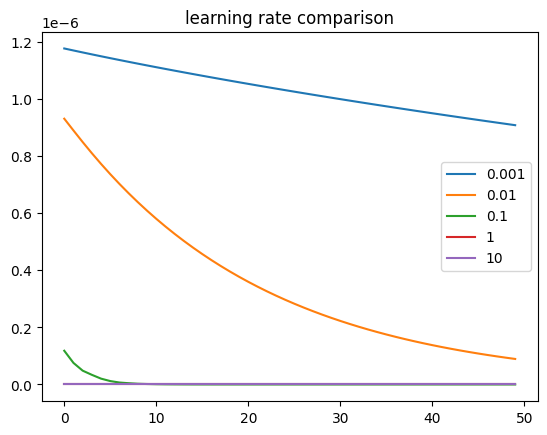

In [900]:
df.plot(title="learning rate comparison")

### Comment on findings of exercise 2
The fastest learning rate is by far 10, which was a bit surprising to discover as I have learned that 0.1, 0.01 and 0.001 are the usual go to learning rates. However, it makes sense that the biggest learning rate is faster in the sense that it takes the largest amount of steps per iteration.

# Problem 3
Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?